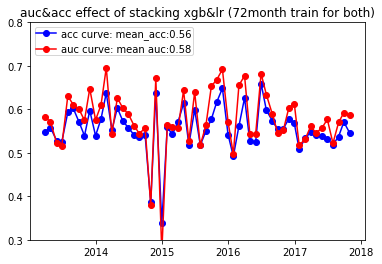

In [11]:
from datetime import datetime
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

def get_test_auc_acc(filename):
    '''
    计算二分类模型样本外的ACC与AUC，按照日期统计
    返回:
        acc_list: 样本外的预测准确率集合
        auc_list: 样本外的预测AUC集合
        mean_acc: 样本外的平均预测准确率
        mean_auc: 样本外的平均预测AUC
    '''
    
    df = pd.read_csv(filename)
    #只查看原有label为+1, -1的数据
    df = df[df['label'] != 0]
    df.loc[:, 'predict'] = df.loc[:, 'factor'].apply(lambda x : 1 if x > 0.5 else -1)

    acc_list = []  #保存每个月份的准确率
    auc_list = []  #保存每个月份的AUC指标
    for date, group in df.groupby('tradeDate'):
        df_correct = group[group['predict'] == group['label']]
        correct = len(df_correct) * 1.0 / len(group)
        auc =  roc_auc_score(np.array(group['label']), np.array(group['factor']))
        acc_list.append([date, correct])
        auc_list.append([date, auc])
        
    acc_list = sorted(acc_list, key=lambda x: x[0], reverse=False)
    mean_acc = sum([item[1] for item in acc_list]) / len(acc_list)
    
    auc_list = sorted(auc_list, key=lambda x: x[0], reverse=False)
    mean_auc = sum([item[1] for item in auc_list]) / len(auc_list)
    
    return acc_list, auc_list, round(mean_acc, 2), round(mean_auc, 2)

def plot_accuracy_curve(filename):
    '''
    画图
    '''
    acc_list, auc_list, mean_acc, mean_auc = get_test_auc_acc(filename)

    plt.plot([datetime.strptime(str(item[0]), '%Y%m%d') for item in acc_list], [item[1] for item in acc_list], '-bo')
    plt.plot([datetime.strptime(str(item[0]), '%Y%m%d') for item in auc_list], [item[1] for item in auc_list], '-ro')

    plt.legend([u"acc curve: mean_acc:%s"%mean_acc, u"auc curve: mean auc:%s"%mean_auc], loc='upper left', handlelength=2, handletextpad=0.5, borderpad=0.1)
    plt.ylim((0.3, 0.8))
    plt.title('auc&acc effect of stacking xgb&lr (72month train for both)')
    plt.show()

plot_accuracy_curve( "stacking_xgb0524.csv")

In [12]:
df = pd.read_csv( "lgbr0524.csv")
df.head()

,Unnamed: 0,ticker,tradeDate,abs_return,factor
0,24971,1,20101231,-0.030377,0.040304
1,24972,2,20101231,-0.002537,0.034208
2,24973,60,20101231,-0.147143,0.015255
3,24974,63,20101231,-0.033702,0.029455
4,24975,69,20101231,0.000000,0.031467


In [14]:
df = pd.read_csv( "rf0503_quantile10.csv")
df.head()

,Unnamed: 0,ticker,tradeDate,active_return,factor
0,24971.0,1,20101231,-0.013876900000000001,0.010811333450137382
1,24972.0,2,20101231,0.01396344,0.022471517677367627
2,24973.0,60,20101231,-0.13064269,0.0018325092413619074
3,24974.0,63,20101231,-0.017201599999999997,0.022344313172469016
4,24975.0,69,20101231,0.0165,0.018001419379473763
